In [8]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: State the null hypothesis: The lady cannot discriminate the tea.
        State the alternative hypothesis: The lady can discriminate the tea. 

Step 2: The test statistic will be the correct discriminated out of 8 cups. I see a sample of 6.

Step 3: P-value, neeed the distrobution of test stat under H_0. 
        X: number of times she correctly choose tea first. 
        Note: this is a hypergeometric problem
        X ~ Hypergeom(M=8,n=4,N=4)
        P-value = P(X>=3) = 1 - P(X<=2)

In [9]:
# Think about the marble yearn in this situation.

M = 8 #Number of objects
n = 4 #Successes
N = 4 #Trials

1 - stats.hypergeom.cdf(2,M,n,N)

0.24285714285714288

Step 4: Conclude: Do not reject the null hypothesis because we don't have enough information to tell. Could have guessed 6 correct 25% of the time. 

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [10]:
iris=Table().read_table("data/iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: State the null hypothesis: "the virginica and versicolor have equal mean sepal width"
        

State the alternative hypothesis: "the virginica and versicolor have different mean sepal width" 

Step 2: Determine/Calculate test statistic: The observed difference between the sample means between virginica and versicolor.

Step 3: Find the P-Value, need the distrobution of test stat under H_0. If H_0 was true it would be zero or near it. 

In [11]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs
#iris_sub.show()

0.20399999999999974

In [12]:
#Shuffle all the values above and find the mean repeatedly.
num_obs = iris_sub.num_rows
ts = []

for i in np.arange(10000):
    iris_sample = iris_sub.with_column('sampled',iris_sub.sample(num_obs,with_replacement=False).column(1))
    ts = np.append(ts, np.diff(iris_sample.group(0,np.mean).column(2))[0])

C:\Users\C20Pierce.Pluemer\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


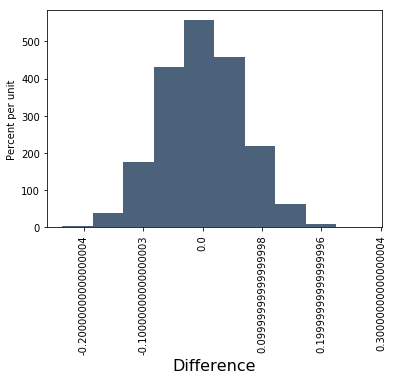

In [13]:
Table().with_column('Difference', ts).hist()

In [14]:
sum(ts>=0.20399)/10000

0.0009

Step 4: Reject the null hypothesis because there is a 0.0009 chance from the simulated results that the sepals are the same length do to being random. 